# <font color='#eb3483'> Exploratory Data Analysis </font>


## What is Exploratory Data Analysis?  

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually.   

Plotting in EDA consists of Histograms, Box 
plot, Scatter plot and many more.   

It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

<div>
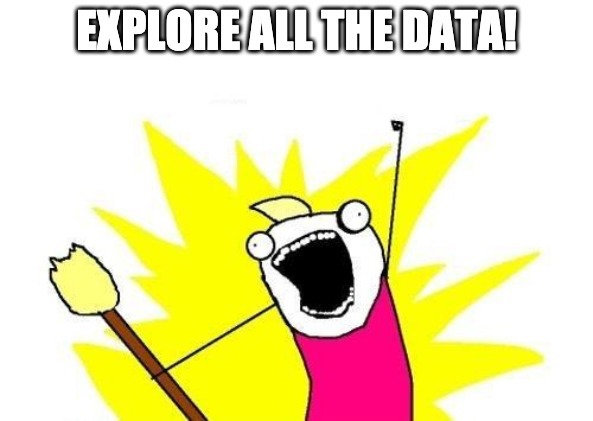
</div>

# In our notebook:

We'll be covering:

1. Loading and inspecting your data

1. Cleaning the data which includes:  
   2.1. dropping some columns      
   2.2. removing duplicates     
   2.3. checking data types and fixing if needed       
   2.4. dealing with missing values  
   2.5. looking for outliers and deciding how to deal with these  
1. Cardinality of categorical variables

1. Digging into patterns
1. Pandas profiling



# <font color='#eb3483'> AirBnB New York  </font>




### Background


http://insideairbnb.com/get-the-data.html


What can we say about the prices of air bnbs in New York.   
Are there certain neighbourhoods that are more expensive.   
Do properties with higher ratings charge more?  
Does more rooms mean more money? 

This is a great place to start digging in to these questions or generating hypotheses, with data on the price, neighbourhood, layout and ratings per air bnb rental.

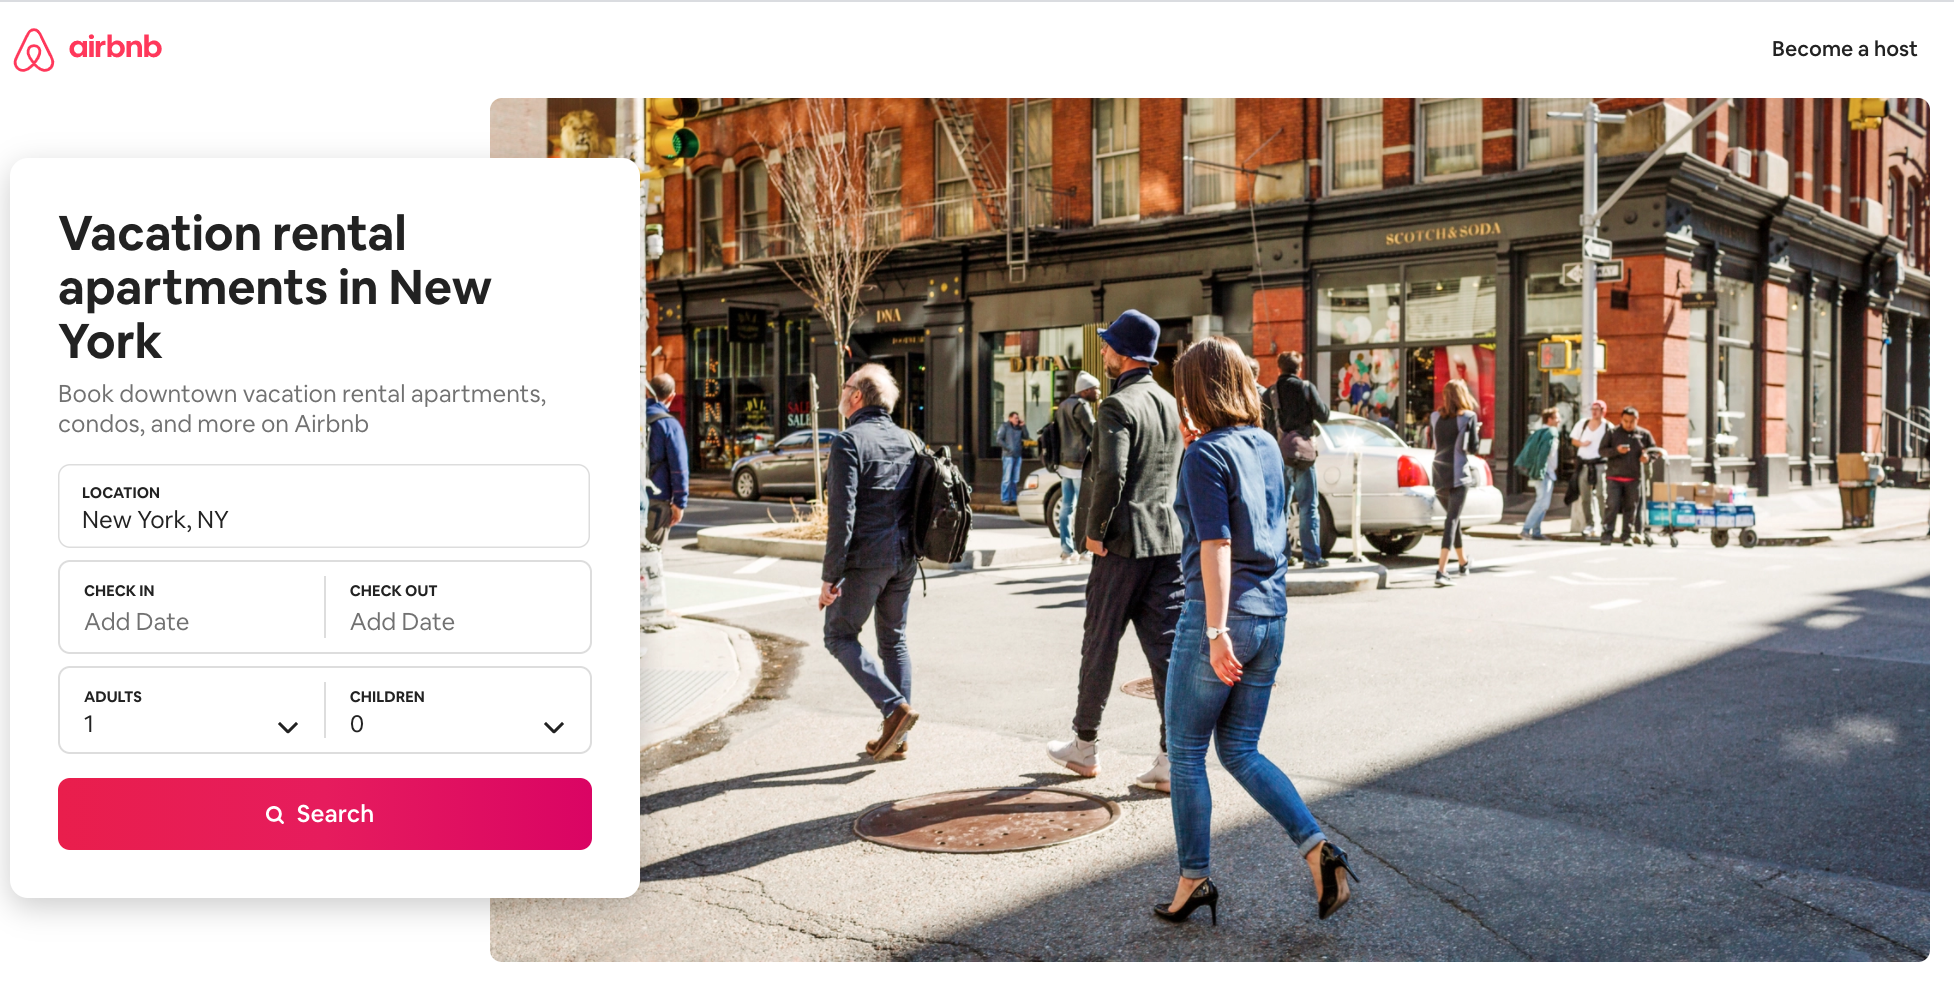

In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## <font color='#eb3483'> 1. Loading and inspecting your data </font>


In [2]:
df = pd.read_csv("data/NYairbnb_test.csv")
df.head()

id                                               name  host_id  \
0  2595                              Skylit Midtown Castle     2845   
1  3831  Whole flr w/private bdrm, bath & kitchen(pls r...     4869   
2  5121                                    BlissArtsSpace!     7356   
3  5136           Spacious Brooklyn Duplex, Patio + Garden     7378   
4  5178                   Large Furnished Room Near B'way　     8967   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0     Jennifer           Manhattan             Midtown  40.75356  -73.98559   
1  LisaRoxanne            Brooklyn  Bedford-Stuyvesant  40.68494  -73.95765   
2        Garon            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
3      Rebecca            Brooklyn         Sunset Park  40.66265  -73.99454   
4     Shunichi           Manhattan             Midtown  40.76457  -73.98317   

         room_type  accommodates  ...  bedrooms  beds  price  minimum_nights  \
0  Entire home/apt             2  ...       NaN   1.0    150              30   
1  Entire home/apt             3  ...       1.0   3.0     79               1   
2     Private room             2  ...       1.0   1.0     60              30   
3  Entire home/apt             4  ...       2.0   2.0    175              21   
4     Private room             2  ...       1.0   1.0     61               2   

   number_of_reviews  last_review reviews_per_month  \
0                 48      11/4/19              0.34   
1                403       5/4/21              5.16   
2                 50       6/5/16              0.56   
3                  1       1/2/14              0.01   
4                474      9/25/20              3.61   

   calculated_host_listings_count  availability_365  review_scores_rating  
0                               3             308.0                  4.70  
1                               1             208.0                  4.46  
2                               1             365.0                  4.52  
3                               1             134.0                  5.00  
4                               1             246.0                  4.19  

[5 rows x 21 columns]

What other commands can we use to have a high level glance at our data frame?

In [3]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                  float64
review_scores_rating              float64
dtype: object

In [4]:
df.describe()

id       host_id      latitude     longitude  accommodates  \
count  3.641200e+04  3.641200e+04  36412.000000  36412.000000  36412.000000   
mean   2.621074e+07  1.004266e+08     40.729432    -73.949919      2.828106   
std    1.594026e+07  1.175263e+08      0.055227      0.049122      5.548117   
min    2.595000e+03  2.438000e+03     40.508630    -74.241350      0.000000   
25%    1.155341e+07  1.000066e+07     40.689680    -73.983190      2.000000   
50%    2.645110e+07  4.308416e+07     40.725360    -73.955135      2.000000   
75%    4.137292e+07  1.622809e+08     40.762670    -73.932068      4.000000   
max    5.016793e+07  4.045568e+08     40.916608    -73.710870   1000.000000   

       bathrooms      bedrooms          beds          price  minimum_nights  \
count        0.0  32682.000000  35801.000000   36412.000000    36412.000000   
mean         NaN      1.327581      1.537918     160.001428       23.090245   
std          NaN      0.728137      1.137487     646.627745       28.118181   
min          NaN      1.000000      0.000000       0.000000        1.000000   
25%          NaN      1.000000      1.000000      65.000000        3.000000   
50%          NaN      1.000000      1.000000     102.000000       30.000000   
75%          NaN      1.000000      2.000000     171.000000       30.000000   
max          NaN     14.000000     42.000000  110000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       36412.000000       26947.000000                    36412.000000   
mean           23.089146           1.198963                       12.198808   
std            49.370674           3.265330                       41.207526   
min             0.000000           0.010000                        1.000000   
25%             0.000000           0.110000                        1.000000   
50%             4.000000           0.400000                        1.000000   
75%            20.000000           1.340000                        3.000000   
max           972.000000         171.530000                      283.000000   

       availability_365  review_scores_rating  
count      35865.000000          26947.000000  
mean         106.756364              4.573474  
std          134.601331              0.868815  
min            0.000000              0.000000  
25%            0.000000              4.560000  
50%           15.000000              4.820000  
75%          217.000000              5.000000  
max          365.000000              5.000000

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'review_scores_rating'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36412 entries, 0 to 36411
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36412 non-null  int64  
 1   name                            36398 non-null  object 
 2   host_id                         36412 non-null  int64  
 3   host_name                       36386 non-null  object 
 4   neighbourhood_group             36412 non-null  object 
 5   neighbourhood                   36412 non-null  object 
 6   latitude                        36412 non-null  float64
 7   longitude                       36412 non-null  float64
 8   room_type                       36412 non-null  object 
 9   accommodates                    36412 non-null  int64  
 10  bathrooms                       0 non-null      float64
 11  bedrooms                        32682 non-null  float64
 12  beds                            

In [7]:
df.apply('nunique') # this is a useful one

id                                36230
name                              35042
host_id                           25679
host_name                          8946
neighbourhood_group                   5
neighbourhood                       221
latitude                          17298
longitude                         14089
room_type                             4
accommodates                         18
bathrooms                             0
bedrooms                             13
beds                                 21
price                               829
minimum_nights                      119
number_of_reviews                   399
last_review                        2407
reviews_per_month                   982
calculated_host_listings_count       56
availability_365                    366
review_scores_rating                154
dtype: int64

In [8]:
# pd.set_option('display.float_format', lambda x: '%.5f' % x)
# df.describe()

In [9]:
#what are some interesting insights we can pull out just from the above code?

<hr>

## <font color='#eb3483'> 2. Clean the data </font>

Some (but potentially not all) steps to take in cleaning the data includes:  
     2.1. dropping columns we don't need  
     2.2. removing duplicates  
     2.3. checking data types and fixing if needed  
     2.4. dealing with missing values  
     2.5. looking for outliers and deciding how to deal with these 



## <font color='#eb3483'> 2.1. Drop columns we dont need </font>


In [10]:
# removing uneeded columns - lets have a browse through see what we can probably remove
df.head()
#df.columns

#use .unique() command to check out whats in a column if needed

# list them 
# 'name', 'host_name', 'latitude', 'longitude', 'bathrooms', 'minimum_nights',
# 'last_review', 'reviews_per_month', 'calculated_host_listings_count'
# 'availability_365'
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'review_scores_rating'],
      dtype='object')

In [11]:
df.head()

id                                               name  host_id  \
0  2595                              Skylit Midtown Castle     2845   
1  3831  Whole flr w/private bdrm, bath & kitchen(pls r...     4869   
2  5121                                    BlissArtsSpace!     7356   
3  5136           Spacious Brooklyn Duplex, Patio + Garden     7378   
4  5178                   Large Furnished Room Near B'way　     8967   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0     Jennifer           Manhattan             Midtown  40.75356  -73.98559   
1  LisaRoxanne            Brooklyn  Bedford-Stuyvesant  40.68494  -73.95765   
2        Garon            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
3      Rebecca            Brooklyn         Sunset Park  40.66265  -73.99454   
4     Shunichi           Manhattan             Midtown  40.76457  -73.98317   

         room_type  accommodates  ...  bedrooms  beds  price  minimum_nights  \
0  Entire home/apt             2  ...       NaN   1.0    150              30   
1  Entire home/apt             3  ...       1.0   3.0     79               1   
2     Private room             2  ...       1.0   1.0     60              30   
3  Entire home/apt             4  ...       2.0   2.0    175              21   
4     Private room             2  ...       1.0   1.0     61               2   

   number_of_reviews  last_review reviews_per_month  \
0                 48      11/4/19              0.34   
1                403       5/4/21              5.16   
2                 50       6/5/16              0.56   
3                  1       1/2/14              0.01   
4                474      9/25/20              3.61   

   calculated_host_listings_count  availability_365  review_scores_rating  
0                               3             308.0                  4.70  
1                               1             208.0                  4.46  
2                               1             365.0                  4.52  
3                               1             134.0                  5.00  
4                               1             246.0                  4.19  

[5 rows x 21 columns]

In [12]:
df.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [13]:
# First step is to clean the data and see which are the redundant or unnecessary cols
# drop the columns we listed above that we dont want. 

# df.drop(columns=['name', 'host_name', 'latitude', 'longitude', 'bathrooms', 'minimum_nights',
#                  'last_review', 'reviews_per_month', 'calculated_host_listings_count',
#                  'availability_365'])
df.head()

id                                               name  host_id  \
0  2595                              Skylit Midtown Castle     2845   
1  3831  Whole flr w/private bdrm, bath & kitchen(pls r...     4869   
2  5121                                    BlissArtsSpace!     7356   
3  5136           Spacious Brooklyn Duplex, Patio + Garden     7378   
4  5178                   Large Furnished Room Near B'way　     8967   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0     Jennifer           Manhattan             Midtown  40.75356  -73.98559   
1  LisaRoxanne            Brooklyn  Bedford-Stuyvesant  40.68494  -73.95765   
2        Garon            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
3      Rebecca            Brooklyn         Sunset Park  40.66265  -73.99454   
4     Shunichi           Manhattan             Midtown  40.76457  -73.98317   

         room_type  accommodates  ...  bedrooms  beds  price  minimum_nights  \
0  Entire home/apt             2  ...       NaN   1.0    150              30   
1  Entire home/apt             3  ...       1.0   3.0     79               1   
2     Private room             2  ...       1.0   1.0     60              30   
3  Entire home/apt             4  ...       2.0   2.0    175              21   
4     Private room             2  ...       1.0   1.0     61               2   

   number_of_reviews  last_review reviews_per_month  \
0                 48      11/4/19              0.34   
1                403       5/4/21              5.16   
2                 50       6/5/16              0.56   
3                  1       1/2/14              0.01   
4                474      9/25/20              3.61   

   calculated_host_listings_count  availability_365  review_scores_rating  
0                               3             308.0                  4.70  
1                               1             208.0                  4.46  
2                               1             365.0                  4.52  
3                               1             134.0                  5.00  
4                               1             246.0                  4.19  

[5 rows x 21 columns]

In [14]:
# do we waant to rename any columns?
# lets rename review_scores_rating to review_rating
df.rename(columns={'review_scores_rating': 'review_rating'}, inplace=True)
df.head()

id                                               name  host_id  \
0  2595                              Skylit Midtown Castle     2845   
1  3831  Whole flr w/private bdrm, bath & kitchen(pls r...     4869   
2  5121                                    BlissArtsSpace!     7356   
3  5136           Spacious Brooklyn Duplex, Patio + Garden     7378   
4  5178                   Large Furnished Room Near B'way　     8967   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0     Jennifer           Manhattan             Midtown  40.75356  -73.98559   
1  LisaRoxanne            Brooklyn  Bedford-Stuyvesant  40.68494  -73.95765   
2        Garon            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
3      Rebecca            Brooklyn         Sunset Park  40.66265  -73.99454   
4     Shunichi           Manhattan             Midtown  40.76457  -73.98317   

         room_type  accommodates  ...  bedrooms  beds  price  minimum_nights  \
0  Entire home/apt             2  ...       NaN   1.0    150              30   
1  Entire home/apt             3  ...       1.0   3.0     79               1   
2     Private room             2  ...       1.0   1.0     60              30   
3  Entire home/apt             4  ...       2.0   2.0    175              21   
4     Private room             2  ...       1.0   1.0     61               2   

   number_of_reviews  last_review reviews_per_month  \
0                 48      11/4/19              0.34   
1                403       5/4/21              5.16   
2                 50       6/5/16              0.56   
3                  1       1/2/14              0.01   
4                474      9/25/20              3.61   

   calculated_host_listings_count  availability_365  review_rating  
0                               3             308.0           4.70  
1                               1             208.0           4.46  
2                               1             365.0           4.52  
3                               1             134.0           5.00  
4                               1             246.0           4.19  

[5 rows x 21 columns]

## <font color='#eb3483'> 2.2. Removing duplicates </font>


In [15]:
#Let's look for duplicate rows

print(df.shape)

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]

print(duplicate_rows_df.shape)


(36412, 21)
(157, 21)


In [16]:
# whoooops! not cool - let's remove them.
df = df.drop_duplicates(keep='first')

print(df.shape)

(36255, 21)


## <font color='#eb3483'> 2.3. Check data types </font>


In [17]:
#lets have a quick look at our data types
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                  float64
review_rating                     float64
dtype: object

In [18]:
#Any issues here?

In [19]:
# How about changing the last_review to DateTime column. 
#- Hint you can use the function 'to_datetime'


In [20]:
#lets change host ID to an object. isnt really a number - its a category
# cant remember how - google is your friend.
# Hint - use ...  .astype(object)
df['host_id'] = df['host_id'].astype(str)

In [21]:
# check changes are as desired
df.dtypes

id                                  int64
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                  float64
review_rating                     float64
dtype: object

## <font color='#eb3483'> 2.4. Missing values </font>


In [22]:
print(df.isnull().sum())

id                                    0
name                                 14
host_id                               0
host_name                            26
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
accommodates                          0
bathrooms                         36255
bedrooms                           3726
beds                                610
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        9459
reviews_per_month                  9459
calculated_host_listings_count        0
availability_365                    547
review_rating                      9459
dtype: int64


### <font color='#eb3483'>Missigno </font>
This package let's us view how our missing data is spread out across rows and columns in a super convenient visual format (package found here: https://github.com/ResidentMario/missingno)

You can install this package by using `pip install missingno`.

In [23]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


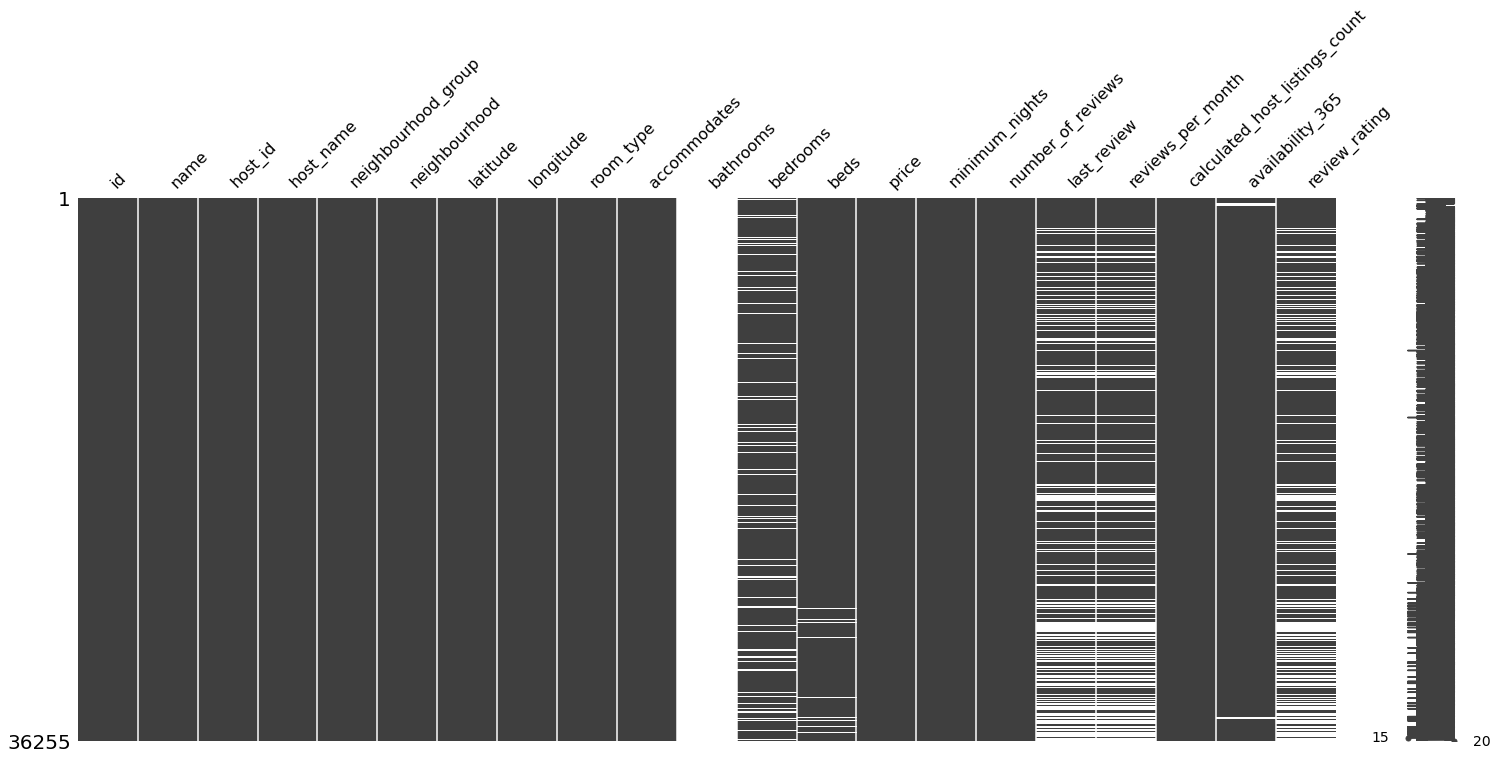

In [24]:
import missingno as msno

msno.matrix(df);

In [25]:
# what do we see here. 

# drop any columns you might need ... but be careful :)


What CAN one do about missing values ... 
1. Remove those records with missing values  
`df = df.dropna()`   
or  
`df = df.dropna(subset=["column2", "column5", "this_column", "that_column"])`  


2. Replace the null values with a particular value, for example 0 or "missing". It is a simple technique but adds noise (because it assumes the null values are one specific case).  
`df["column1"] = df.column1.fillna("missing")`  
`df["this_column"] = df.this_columns.fillna(0)`  


3. Data Imputation: We can replace the missing values with a particular value, but use some criteria to choose that value. Common imputation practices are imputing with the mean, mode or median.

In [26]:
#EXAMPLE:
# Let's impute missing values for availability using mean availability

#Step 1 - get the mean availability
review_rating_mean = df.review_rating.mean()

# Step 2 - fill NaNs with mean availability_365_mean
df.review_rating = df.review_rating.fillna(review_rating_mean)


There are other techniques to deal with missing values:

- Use a predictive model to predict the missing values.

- More sophisticated methods: [MICE](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/) is a method that deals with missing values, and in this [repository](https://github.com/hammerlab/fancyimpute) there are more methods

[Here](https://gallery.cortanaintelligence.com/Experiment/Methods-for-handling-missing-values-1) there are more strategies

## <font color='#eb3483'> 2.5. Looking for and dealing with outliers </font>


In [27]:
df.describe()

id      latitude     longitude  accommodates  bathrooms  \
count  3.625500e+04  36255.000000  36255.000000  36255.000000        0.0   
mean   2.632403e+07     40.729411    -73.949872      2.827307        NaN   
std    1.588130e+07      0.055240      0.049130      5.558368        NaN   
min    2.595000e+03     40.508630    -74.241350      0.000000        NaN   
25%    1.173955e+07     40.689675    -73.983180      2.000000        NaN   
50%    2.664588e+07     40.725370    -73.955110      2.000000        NaN   
75%    4.143109e+07     40.762635    -73.931975      4.000000        NaN   
max    5.016793e+07     40.916608    -73.710870   1000.000000        NaN   

           bedrooms          beds          price  minimum_nights  \
count  32529.000000  35645.000000   36255.000000    36255.000000   
mean       1.327523      1.537691     160.056599       23.090636   
std        0.727942      1.136718     647.990870       28.137434   
min        1.000000      0.000000       0.000000        1.000000   
25%        1.000000      1.000000      65.000000        3.000000   
50%        1.000000      1.000000     102.000000       30.000000   
75%        1.000000      2.000000     171.000000       30.000000   
max       14.000000     42.000000  110000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       36255.000000       26796.000000                    36255.000000   
mean           22.755813           1.199150                       12.242367   
std            48.796362           3.273587                       41.290984   
min             0.000000           0.010000                        1.000000   
25%             0.000000           0.110000                        1.000000   
50%             4.000000           0.400000                        1.000000   
75%            19.000000           1.340000                        3.000000   
max           972.000000         171.530000                      283.000000   

       availability_365  review_rating  
count      35708.000000   36255.000000  
mean         106.396298       4.572676  
std          134.480945       0.748813  
min            0.000000       0.000000  
25%            0.000000       4.572676  
50%           14.000000       4.670000  
75%          216.000000       4.940000  
max          365.000000       5.000000

(0.0, 20.0)

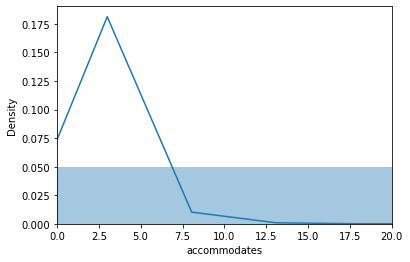

In [28]:
#make a distribution plot for accommodates using sns (hint use -> sns.distplot)
# sns.distplot(df['accommodates'], kde=False);
sns.distplot(df['accommodates']);
plt.xlim([0, 20])

In [ ]:
#make a boxplot for accommodates using sns (hint use -> sns.boxplot)
sns.boxplot(df['accommodates']);
plt.xlim([-1, 20])

In [30]:
# lets check out the unique values (always useful)
np.sort(df.accommodates.unique())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16, 1000], dtype=int64)

In [31]:
# hmmmmm, that looks quite high. lets check this out ... is this a true outlier?
# Pull out values > 20 and have a look see wht you think
df[df['accommodates'] > 20]

id                        name   host_id host_name  \
2375  2488022  Sunny Quiet Room In Harlem  12732806    Jerome   

     neighbourhood_group neighbourhood  latitude  longitude     room_type  \
2375           Manhattan        Harlem  40.81555  -73.95338  Private room   

      accommodates  ...  bedrooms  beds  price  minimum_nights  \
2375          1000  ...       1.0   1.0     59              30   

      number_of_reviews  last_review reviews_per_month  \
2375                 32     11/11/19              0.85   

      calculated_host_listings_count  availability_365  review_rating  
2375                               1             364.0           4.75  

[1 rows x 21 columns]

In [32]:
#lets fix this - 


In [33]:
# Let's check out price in the same way.
df.price.describe()

count     36255.000000
mean        160.056599
std         647.990870
min           0.000000
25%          65.000000
50%         102.000000
75%         171.000000
max      110000.000000
Name: price, dtype: float64

In [ ]:
# get a distribution plot (histogram)
sns.distplot(df['price'])

In [ ]:
#get boxplot


In [ ]:
# Let's deal with some price issues
#check out shape to remind yourself
#Remove rows with price greater 20000USD (hint you can do this by retaining anything under)



### IMPORTANT Remember - to include assumptions and steps you took about outliers in your notes at the end of your notebook

In [ ]:
# check shape again

In [ ]:
#now replot boxblot of price

In [ ]:
# what if we HAD LOTS OF VARIABLES and wanted to look at all the numerical values at once. 
numerical = [
  'accommodates', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_rating'
]

#could also pull out columns based on dtype
#numerical = df.select_dtypes(include=np.number) # different way of doing the above. 


In [ ]:
df[numerical].hist(bins=15, figsize=(15, 8), layout=(3, 4));


In [ ]:
#Hmmm whats going on with bedrooms?

EXERCISE: Take 10-15 minutes and investigate cleaning fee, number of reviews, bedrooms, batherooms, beds and review scores rating and see whether you think there might be any outliers in there. 

<hr>

In general, extreme values are those values that are different than the variable distribution, and estimating summary statistics for a column with outliers yields unreliable results.

One common practice is to consider outliers those values with a z score higher than 3 (that means, they are 3 standard deviations   bigger or smaller than the mean.

z score is defined as:

$$z(x)= \frac{x-\mu}{\sigma}$$

So you can always double check whether values fall above this for potential extreme outliers.

## <font color='#eb3483'> 3: Assessing integrety of categorical variables --> Cardinality </font>



It is good practice to look at the categorical variables to get an idea of the cardinality (how many options in a category) - and how useful they might be in groupings or  summarising variables. 


High cardinality =  variables with few repeated values (ie all different) e.g. Host ID   

Low cardinality = many repeated values (ie almost all one type)



In [ ]:
#remind yourself of data types
df.dtypes

In [ ]:
df.neighbourhood.unique()

In [ ]:
df.neighbourhood_group.unique()

In [ ]:
sns.countplot(y = df['neighbourhood_group']);


In [ ]:
#Or we can view this as a ratio
df.neighbourhood_group.value_counts(normalize=True).plot.barh(); # as a ratio


<hr>

In [ ]:
#When would cardinality not be informative for a categorical variable?


So what can we summarize from our above steps?

### <font color='#eb3483'> Data Dictionary <font color='#eb3483'>

It is important to write down the description and datatypes of the variables.
(in our case it's pretty self explnatory but you may have done some major transformations and its good to try and keep track of them)  - especially for when sharing notebooks (think internships) or coming back to it months later.

* id            --                     int64  
* host_id         --                categorical  
* host_since       --               date 
* neighbourhood      --             categorical  
* city        --                    categorical  
* zipcode      --                   categorical  
* latitude      --                 float64  
* longitude     --                 float64  
* property_type       --            categorical  
* room_type           --            categorical  
* accommodates        --             int64  
* bathrooms           --           float64  
* bedrooms             --          float64  
* beds                 --          float64  
* bed_type             --           categorical  
* price                --            int64  
* number_of_reviews    --            int64  
* review_scores_rating  --         float64  




### <font color='#eb3483'> Data processing steps </font>
- There are xxx duplicate rows (we have removed them)
- The variables `xxx, xxx, xxx and xxx` have missing values - what did we do with these?
- The categorical variable `xxx, xxx` has a dominant class (65% of xxx are xxx, etc)
- There are outliers in the variables `xxx and xxx` - what did we do with these?


### <font color='#eb3483'> Variable Exploration Description <font color='#eb3483'>
(Distributions & Cardinality)  
Here we describe the possible entities(groupings) that we can break our dataset into, this will help us think of different ways to slice and group the dataset in further steps.

- 4 neighbourhood _groups
- 38 neighbourhoods
- Room_type -> hotels were the most frequent room type
- Accommodates - > good range of sizes of properties.


### <font color='#eb3483'>  Saving our data </font>
After each step it is important to save the dataset with a different name (so we dont modify the original).

In [ ]:
df.to_csv("data/ny_airbnb_processed.csv", index=False)

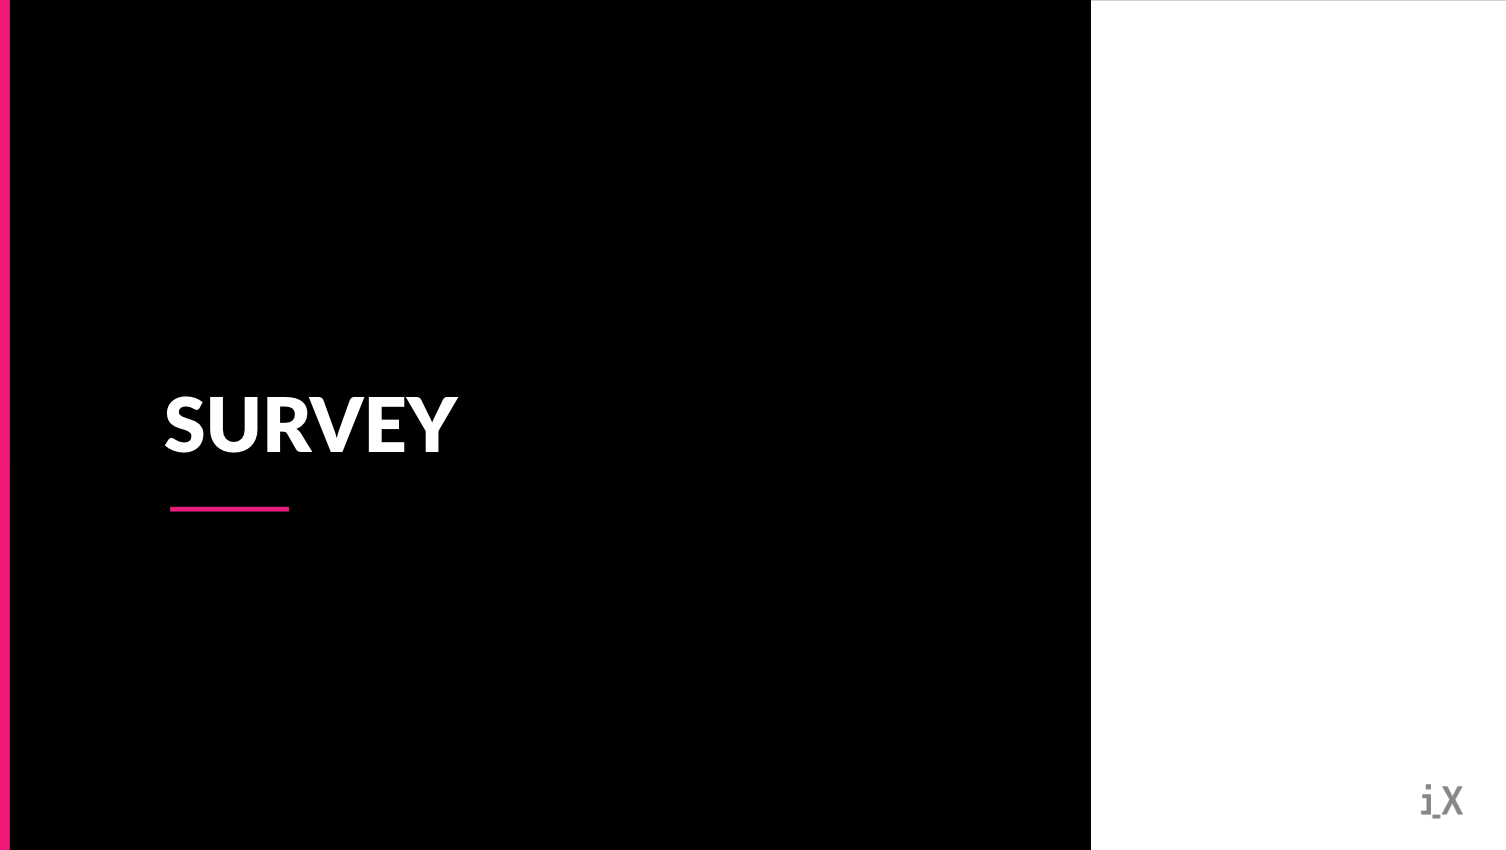

<hr>

### <font color='#eb3483'>An extra tit-bit: Pickling </font>


We usually export our datasets to csv, because it is a format that is easily readable in pretty much any platform.

However, CSV (`Comma Separated Values`) is a simple format, and when we export a dataframe to csv some of the information gets lost in translation, as categories will turn into text. 

One way to avoid this is to save the dataframe into a native python format `pickle`. Saving a dataframe as a pickle file has two main advantages. One is that reading the dataframe is much faster, because python can read the file from the hard drive as a dataframe directly (pandas doesnt have to read a text file and convert it into a dataframe). The second advantage is that we keep all of the original column dtypes.

Pandas can read and write pickle files very easily (`read_pickle` and `to_pickle`).

In [ ]:
df.to_pickle("data/ny_airbnb_processed.pkl")

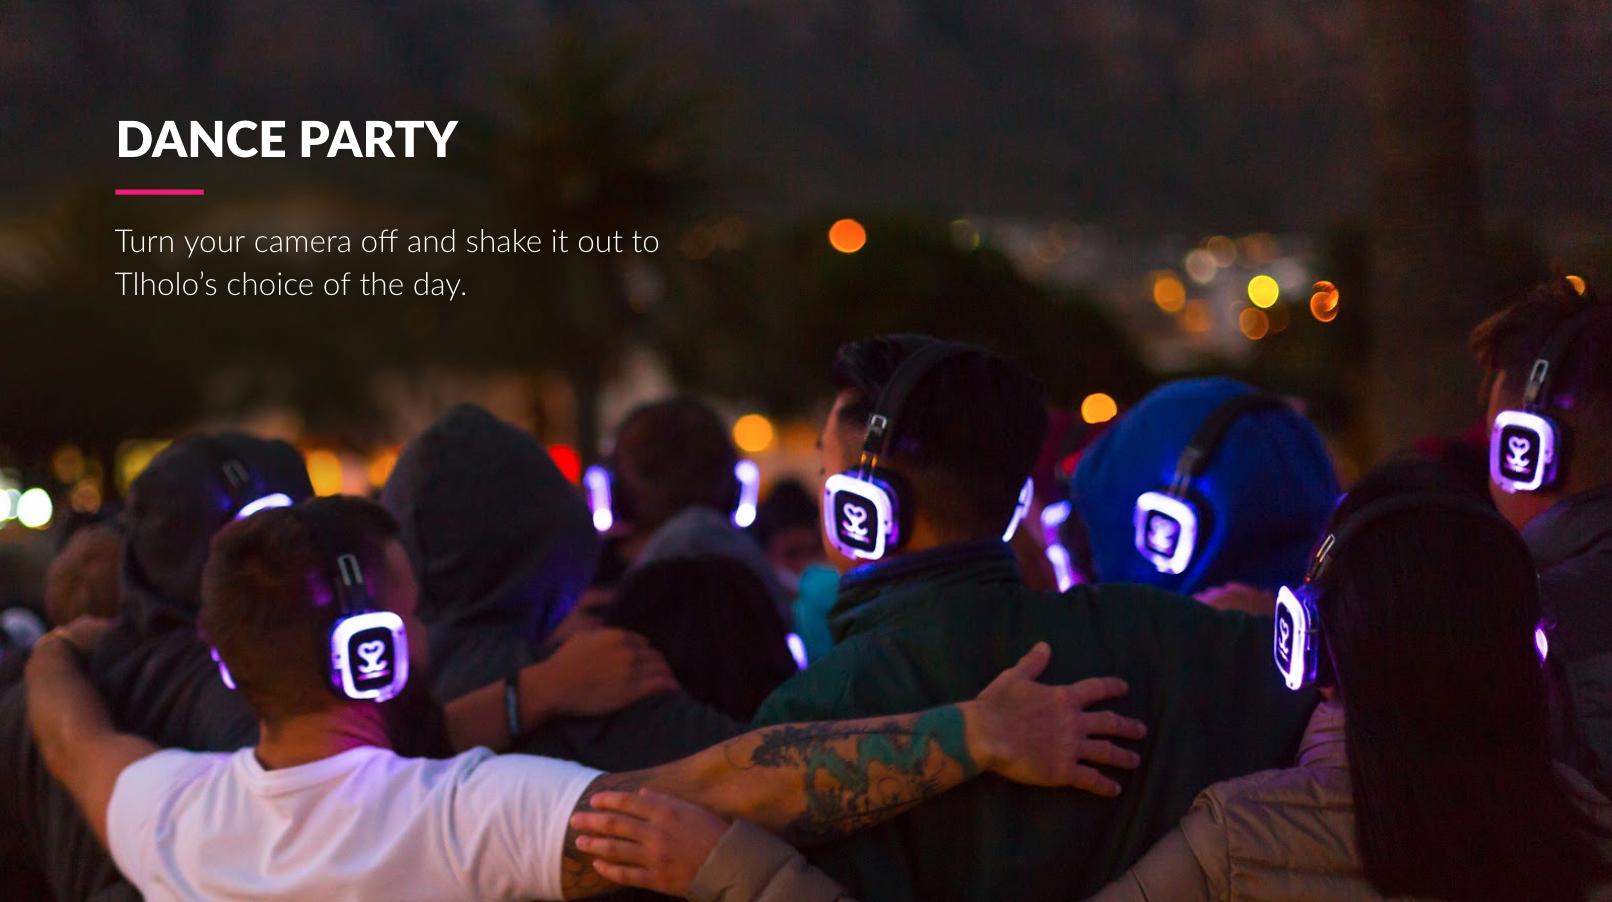